# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [4]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [5]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [6]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

#project_data.drop["project_essay_1","project_essay_2","project_essay_3","project_essay_4"]

In [7]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [8]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [9]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [10]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [12]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [13]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [14]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [15]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:03<00:00, 595.36it/s]


In [14]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills also want learn games kids not want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [16]:
# similarly you can preprocess the titles also

preprocessed_title=[]
for tit in tqdm(project_data['project_title'].values):
    tit = decontracted(tit)
    tit = tit.replace('\\r', ' ')
    tit = tit.replace('\\"', ' ')
    tit = tit.replace('\\n', ' ')
    tit = re.sub('[^A-Za-z0-9]+', ' ', tit)
    tit = ' '.join(e for e in tit.split() if e not in stopwords)
    preprocessed_title.append(tit.lower().strip())    
print(preprocessed_title[23])

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:09<00:00, 11656.60it/s]


instrumental power conquering steam


## 1.5 Preparing data for models

In [19]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [17]:
# removing special characters
import re
cleaned_prefix = []    

for prefix in (project_data['teacher_prefix'].values):
    prefix = re.sub('[^A-Za-z0-9]+', ' ', str(prefix))
    cleaned_prefix.append(prefix)

vectorizer = CountVectorizer(vocabulary=set(cleaned_prefix),lowercase=True, binary=True)
vectorizer.fit(cleaned_prefix)
print(vectorizer.get_feature_names())

teacher_prefix_one_hot = vectorizer.transform(cleaned_prefix)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Dr ', 'Mr ', 'Mrs ', 'Ms ', 'Teacher', 'nan']
Shape of matrix after one hot encodig  (109248, 6)


In [18]:
project_data['cleaned_prefix'] = cleaned_prefix

In [19]:
# how to drop unamed columns : https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe
project_data.rename({"Unnamed: 0" :"a"},axis="columns",inplace=True)
project_data.drop(["project_essay_1","project_essay_2","project_essay_3","project_essay_4","id","a"],axis=1, inplace=True)
project_data.drop(["teacher_id"],axis=1, inplace=True)

In [20]:
title_count = []
for s in preprocessed_title:
    title_count.append(len(s.split()))

In [21]:
project_data['title_count'] = title_count

# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

### Here we are taking 110k points due to limited memory 

In [22]:
data = project_data[:110000]
data.head(2)

teacher_prefix school_state project_submitted_datetime  \
0           Mrs.           IN        2016-12-05 13:43:57   
1            Mr.           FL        2016-10-25 09:22:10   

  project_grade_category                                     project_title  \
0          Grades PreK-2  Educational Support for English Learners at Home   
1             Grades 6-8             Wanted: Projector for Hungry Learners   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay cleaned_prefix  \
0  My students are English learners that are work...           Mrs    
1  Our students arrive to our school eager to lea...            Mr    

   title_count  
0            5  
1            4

In [23]:
y = data['project_is_approved'].values
data.drop(['project_is_approved'], axis=1, inplace=True)

In [24]:
data.head(2)

teacher_prefix school_state project_submitted_datetime  \
0           Mrs.           IN        2016-12-05 13:43:57   
1            Mr.           FL        2016-10-25 09:22:10   

  project_grade_category                                     project_title  \
0          Grades PreK-2  Educational Support for English Learners at Home   
1             Grades 6-8             Wanted: Projector for Hungry Learners   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects              clean_categories  \
0                                             0             Literacy_Language   
1                                             7  History_Civics Health_Sports   

            clean_subcategories  \
0                  ESL Literacy   
1  Civics_Government TeamSports   

                                               essay cleaned_prefix  \
0  My students are English learners that are work...           Mrs    
1  Our students arrive to our school eager to lea...            Mr    

   title_count  
0            5  
1            4

In [25]:
X=data

In [26]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [27]:
# one hot encoding for "School_state "
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [39]:
# one hot encoding for "School_state "
vectorizer = CountVectorizer()
vectorizer.fit(X_train['cleaned_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_prefix_ohe = vectorizer.transform(X_train['cleaned_prefix'].values)
X_cv_prefix_ohe = vectorizer.transform(X_cv['cleaned_prefix'].values)
X_test_prefix_ohe = vectorizer.transform(X_test['cleaned_prefix'].values)

print("After vectorizations")
print(X_train_prefix_ohe.shape, y_train.shape)
print(X_cv_prefix_ohe.shape, y_cv.shape)
print(X_test_prefix_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 6) (49041,)
(24155, 6) (24155,)
(36052, 6) (36052,)
['dr', 'mr', 'mrs', 'ms', 'nan', 'teacher']


In [29]:
# one hot encoding for "project_grade_category"

vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 3) (49041,)
(24155, 3) (24155,)
(36052, 3) (36052,)
['12', 'grades', 'prek']


In [30]:
# one hot encoding for "clean_categories"

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cleancat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_cleancat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_cleancat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_cleancat_ohe.shape, y_train.shape)
print(X_cv_cleancat_ohe.shape, y_cv.shape)
print(X_test_cleancat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [31]:
# one hot encoding for "clean_subcategories"

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cleansubcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_cleansubcat_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_cleansubcat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_cleansubcat_ohe.shape, y_train.shape)
print(X_cv_cleansubcat_ohe.shape, y_cv.shape)
print(X_test_cleansubcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [32]:
# vectorizing numerical features "teacher_number_of_previously_posted_projects"

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_prevpostproj_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_prevpostproj_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_prevpostproj_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_prevpostproj_norm.shape, y_train.shape)
print(X_cv_prevpostproj_norm.shape, y_cv.shape)
print(X_test_prevpostproj_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [33]:
# vectorizing numerical features "title_count"

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['title_count'].values.reshape(-1,1))

X_train_title_count_norm = normalizer.transform(X_train['title_count'].values.reshape(-1,1))
X_cv_title_count_norm = normalizer.transform(X_cv['title_count'].values.reshape(-1,1))
X_test_title_count_norm = normalizer.transform(X_test['title_count'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_title_count_norm.shape, y_train.shape)
print(X_cv_title_count_norm.shape, y_cv.shape)
print(X_test_title_count_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


<h2>2.3 Make Data Model Ready: encoding essay, and project_title</h2>

## Bag of Words

In [34]:
# BOW for essay
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [40]:
# BOW for "project_title"
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['project_title'].values)
X_cv_title_bow = vectorizer.transform(X_cv['project_title'].values)
X_test_title_bow = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 12031) (49041,)
(24155, 12031) (24155,)
(36052, 5000) (36052,)


## TF-IDF

In [35]:
#TF-idf for "essay"

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [41]:
#TF-idf for "Project_title"

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['project_title'].values)
X_cv_title_tfidf = vectorizer.transform(X_cv['project_title'].values)
X_test_title_tfidf = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 12031) (49041,)
(24155, 12031) (24155,)
(36052, 12031) (36052,)


## Avg-W2V

In [42]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [43]:
# average Word2Vec for "essay" in training data

X_train_essay_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_essay_avgw2v.append(vector)

print(len(X_train_essay_avgw2v))
print(len(X_train_essay_avgw2v[1]))

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [01:04<00:00, 757.83it/s]


49041
300


In [44]:
# average Word2Vec for "essay" in crossvalidation data

X_cv_essay_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_essay_avgw2v.append(vector)

print(len(X_cv_essay_avgw2v))
print(len(X_cv_essay_avgw2v[1]))

100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [00:32<00:00, 750.13it/s]


24155
300


In [45]:
# average Word2Vec for "essay" in test data

X_test_essay_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_essay_avgw2v.append(vector)

print(len(X_test_essay_avgw2v))
print(len(X_test_essay_avgw2v[1]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [00:47<00:00, 763.40it/s]


36052
300


In [46]:
# average Word2Vec for "project_title" in training data

X_train_title_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_title_avgw2v.append(vector)

print(len(X_train_title_avgw2v))
print(len(X_train_title_avgw2v[1]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 33527.88it/s]


49041
300


In [47]:
# average Word2Vec for "project_title" in crossvalidation data

X_cv_title_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_title_avgw2v.append(vector)

print(len(X_cv_title_avgw2v))
print(len(X_cv_title_avgw2v[1]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 31968.11it/s]


24155
300


In [48]:
# average Word2Vec for "project_title" in test data

X_test_title_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_title_avgw2v.append(vector)

print(len(X_test_title_avgw2v))
print(len(X_test_title_avgw2v[1]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 32573.69it/s]


36052
300


### TF-IDF Weighted W2v

In [50]:

tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [51]:
# TF-IDF weighted Word2Vec for "essay" in training data

X_train_essay_weightw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_essay_weightw2v.append(vector)

print(len(X_train_essay_weightw2v))
print(len(X_train_essay_weightw2v[0]))

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [06:03<00:00, 135.04it/s]


49041
300


In [52]:
# TF-IDF weighted Word2Vec for "essay" in cross validation data

X_cv_essay_weightw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_essay_weightw2v.append(vector)

print(len(X_cv_essay_weightw2v))
print(len(X_cv_essay_weightw2v[0]))

100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [02:58<00:00, 135.09it/s]


24155
300


In [53]:
# TF-IDF weighted Word2Vec for "essay" in cross test data

X_test_essay_weightw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_essay_weightw2v.append(vector)

print(len(X_test_essay_weightw2v))
print(len(X_test_essay_weightw2v[0]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [04:33<00:00, 131.82it/s]


36052
300


In [54]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_title = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [55]:
# TF-IDF weighted Word2Vec for "project_title" in training data

X_train_title_weightw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_title[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_title_weightw2v.append(vector)

print(len(X_train_title_weightw2v))
print(len(X_train_title_weightw2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:02<00:00, 21689.79it/s]


49041
300


In [56]:
# TF-IDF weighted Word2Vec for "project_title" in cross validation data

X_cv_title_weightw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_title[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_title_weightw2v.append(vector)

print(len(X_cv_title_weightw2v))
print(len(X_cv_title_weightw2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:01<00:00, 21631.71it/s]


24155
300


In [57]:
# TF-IDF weighted Word2Vec for "project_title" in training data

X_test_title_weightw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_title[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_title_weightw2v.append(vector)

print(len(X_test_title_weightw2v))
print(len(X_test_title_weightw2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 20848.48it/s]


36052
300


<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

## 2.4.1 Applying SVM on BOW,<font color='red'> SET 1</font>

In [58]:
# concatinating all the features
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

from scipy.sparse import hstack
X_tr_bow = hstack((X_train_essay_bow,X_train_title_bow, X_train_state_ohe, X_train_cleancat_ohe, X_train_grade_ohe,X_train_cleansubcat_ohe,X_train_prevpostproj_norm)).tocsr()
X_cr_bow = hstack((X_cv_essay_bow,X_cv_title_bow, X_cv_state_ohe, X_cv_cleancat_ohe, X_cv_grade_ohe,X_cv_cleansubcat_ohe,X_cv_prevpostproj_norm)).tocsr()
X_te_bow = hstack((X_test_essay_bow,X_test_title_bow, X_test_state_ohe, X_test_cleancat_ohe, X_test_grade_ohe,X_test_cleansubcat_ohe,X_test_prevpostproj_norm)).tocsr()

print("Final Data matrix")
print(X_tr_bow.shape, y_train.shape)
print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 17125) (49041,)
(24155, 17125) (24155,)
(36052, 17125) (36052,)


### Hyper parameter tuning using Gridsearch

In [166]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

def hypertune(x , y , p):
    sgd_clf = SGDClassifier(loss = "hinge", penalty = p)

    parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    clf = GridSearchCV(sgd_clf, parameters, cv=3, scoring='roc_auc')
    clf.fit(x, y)
 penalty = p
    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']

    plt.plot(parameters['alpha'], train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

    plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
    plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')

    plt.xscale("log")
    plt.legend()
    plt.xlabel("alpha : hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS ( "+p+" ) REGULARIZOR ")
    plt.grid()
    plt.show()
    print()
    print("MAX AUC is  "+str(np.max(np.array(cv_auc))))

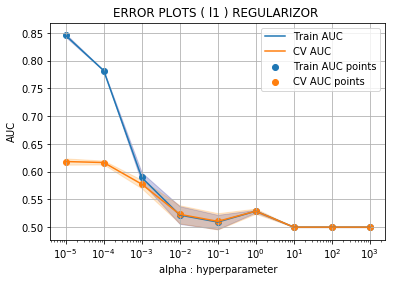


MAX AUC is  0.6182329121389306


In [167]:
hypertune(X_tr_bow , y_train ,"l1" )

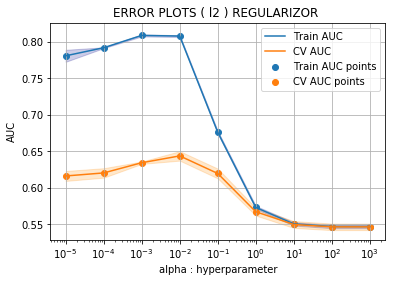


MAX AUC is  0.6434382661350533


In [168]:
hypertune(X_tr_bow , y_train ,"l2" )

**Summary**
From the above two plots  we can see that max AUC is with L2 Refularizor i.e, 64% and also in this plot as hyper parameter alpha increases train AUC and cv AUC increases gradually,but at alpha =0.01 there is sudden fall of both the curves and becomes constant at alpha =10 .So the best hyper parameter is at alpha =0.01.

In [157]:
best_alpha_bow = 0.01


### Roc Curve

In [135]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

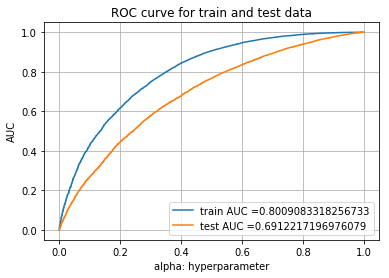

In [158]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

sgd_clf = SGDClassifier(loss = "hinge", alpha=best_alpha_bow ,penalty="l2")
sgd_clf.fit(X_tr_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

calib_clf = CalibratedClassifierCV(sgd_clf, cv=5, method='sigmoid')
calib_clf.fit(X_tr_bow, y_train)

y_train_pred_bow = batch_predict(calib_clf, X_tr_bow )    
y_test_pred_bow = batch_predict(calib_clf, X_te_bow )

train_fpr_bow, train_tpr_bow, tr_thresholds_bow = roc_curve(y_train, y_train_pred_bow)
#test_fpr_bow, test_tpr_bow, te_thresholds_bow = roc_curve(y_test, y_test_pred_bow)

plt.plot(train_fpr_bow, train_tpr_bow, label="train AUC ="+str(auc(train_fpr_bow, train_tpr_bow)))

test_auc_bow = auc(test_fpr_bow, test_tpr_bow)
plt.plot(test_fpr_bow, test_tpr_bow, label="test AUC ="+str(test_auc_bow))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

**Summary**
From the above curves  we can clearly see that both Area under the curve for test data low compared to train data and the difference between two curves is 5% and also AUC for both the curves is greater than 50% .so the model is sensisble.

### Confusion Matrix

In [71]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.795


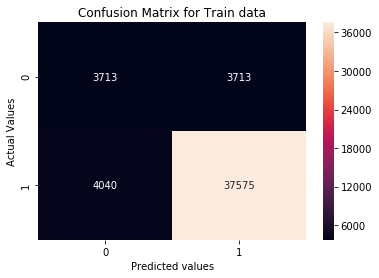

In [142]:
cm_1 = confusion_matrix(y_train, predict(y_train_pred_bow, tr_thresholds_bow, train_fpr_bow, train_fpr_bow))                   
cm_bow = pd.DataFrame(cm_1 , range(2))
sns.heatmap(cm_bow, annot = True, fmt = "d")
plt.title("Confusion Matrix for Train data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()           

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.813


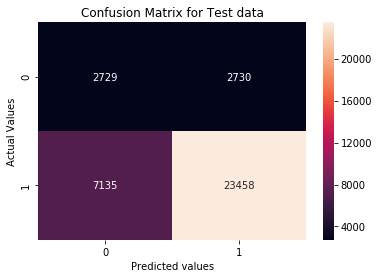

In [74]:
cm_1 = confusion_matrix(y_test, predict(y_test_pred_bow, te_thresholds_bow, test_fpr_bow, test_fpr_bow))                   
cm_bow = pd.DataFrame(cm_1 , range(2))
sns.heatmap(cm_bow, annot = True, fmt = "d")
plt.title("Confusion Matrix for Test data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()                        

### 2.4.2 Applying SVM on TFIDF,<font color='red'> SET 2</font>

In [75]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

X_tr_tfidf = hstack((X_train_essay_tfidf,X_train_title_tfidf, X_train_state_ohe, X_train_cleancat_ohe, X_train_grade_ohe,X_train_cleansubcat_ohe,X_train_prevpostproj_norm)).tocsr()
X_cr_tfidf = hstack((X_cv_essay_tfidf,X_cv_title_tfidf ,X_cv_state_ohe, X_cv_cleancat_ohe, X_cv_grade_ohe,X_cv_cleansubcat_ohe,X_cv_prevpostproj_norm)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_title_tfidf, X_test_state_ohe, X_test_cleancat_ohe, X_test_grade_ohe,X_test_cleansubcat_ohe,X_test_prevpostproj_norm)).tocsr()


### Hyper parameter tuning using Grid search

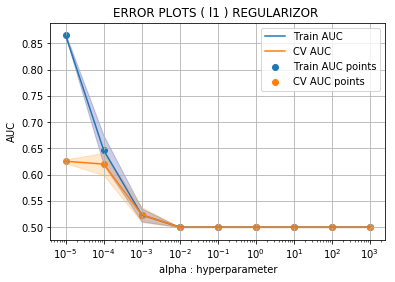


MAX AUC is  0.6253748976032271


In [169]:
hypertune(X_tr_tfidf , y_train ,"l1" )

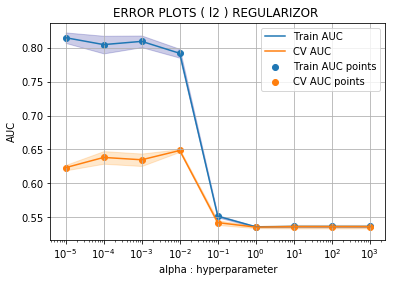


MAX AUC is  0.6485390904447046


In [170]:
hypertune(X_tr_tfidf , y_train ,"l2" )

**Summary**
From the above two plots  we can see that max AUC is with L2 Regularizor i.e, 64% and also in this plot as hyper parameter alpha increases train AUC and cv AUC increases gradually,but at alpha =0.001 there is a slight decrease in both the curves and falls  suddenly at alpha =0.01 .So the best hyper parameter is at alpha =0.001.

In [161]:
best_alpha_tfidf = 0.001

### ROC curve

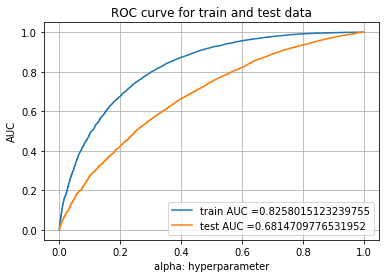

In [192]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

sgd_clf = SGDClassifier(loss = "hinge", alpha=best_alpha_tfidf, penalty="l2")
sgd_clf.fit(X_tr_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

calib_clf = CalibratedClassifierCV(sgd_clf, cv=5, method='sigmoid')
calib_clf.fit(X_tr_tfidf, y_train)

y_train_pred_tfidf = batch_predict(calib_clf, X_tr_tfidf)    
y_test_pred_tfidf = batch_predict(calib_clf, X_te_tfidf)

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred_tfidf)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred_tfidf)

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))

test_auc_tfidf = auc(test_fpr_tfidf, test_tpr_tfidf)
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="test AUC ="+str(test_auc_tfidf))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

**Summary**
From the above curves  we can clearly see that both Area under the curve for test data low compared to train data and the difference between two curves is 14% and also AUC for both the curves is greater than 50% .so the model is sensisble.

### Confusion matric 

the maximum value of tpr*(1-fpr) 0.2499999818661462 for threshold 0.79


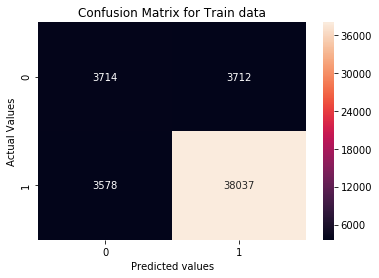

In [163]:
cm_2 = confusion_matrix(y_train, predict(y_train_pred_tfidf, tr_thresholds_tfidf, train_fpr_tfidf, train_fpr_tfidf))                   
cm_tfidf = pd.DataFrame(cm_2 , range(2))
sns.heatmap(cm_tfidf, annot = True, fmt = "d")
plt.title("Confusion Matrix for Train data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()                        

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.825


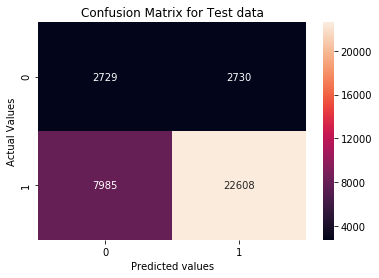

In [164]:
cm_2 = confusion_matrix(y_test, predict(y_test_pred_tfidf, te_thresholds_tfidf, test_fpr_tfidf, test_fpr_tfidf))                   
cm_tfidf = pd.DataFrame(cm_2 , range(2))
sns.heatmap(cm_tfidf, annot = True, fmt = "d")
plt.title("Confusion Matrix for Test data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()                        

### 2.4.3 Applying SVM on AVGW2V,<font color='red'> SET 3</font>

In [80]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
X_tr_avgw2v = hstack((X_train_essay_avgw2v, X_train_title_avgw2v,X_train_state_ohe, X_train_cleancat_ohe, X_train_grade_ohe,X_train_cleansubcat_ohe,X_train_prevpostproj_norm)).tocsr()
X_cr_avgw2v= hstack((X_cv_essay_avgw2v,X_cv_title_avgw2v, X_cv_state_ohe, X_cv_cleancat_ohe, X_cv_grade_ohe,X_cv_cleansubcat_ohe,X_cv_prevpostproj_norm)).tocsr()
X_te_avgw2v = hstack((X_test_essay_avgw2v,X_test_title_avgw2v, X_test_state_ohe, X_test_cleancat_ohe, X_test_grade_ohe,X_test_cleansubcat_ohe,X_test_prevpostproj_norm)).tocsr()


### Hyper parameter Tuning using Gridsearch

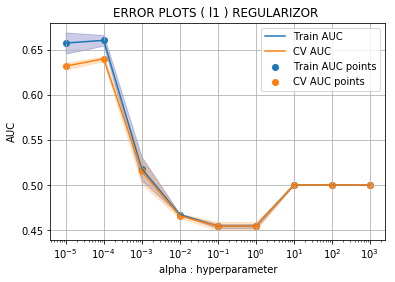


MAX AUC is  0.639801902116011


In [171]:
hypertune(X_tr_avgw2v , y_train ,"l1" )

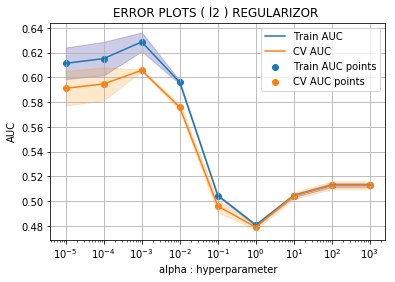


MAX AUC is  0.6057922609539034


In [172]:
hypertune(X_tr_avgw2v , y_train ,"l2" )

**Summary**
From the above two plots  we can see that max AUC is with L1 Regularizor i.e, 63% and also in this plot as hyper parameter alpha increases train AUC and cv AUC increases gradually,but at alpha =0.0001 there is a sudden fall of both the curves and becomes constant at alpha = 10 .So the best hyper parameter is at alpha =0.0001.

In [81]:
best_alpha_avgw2v = 0.0001

### ROC Curve

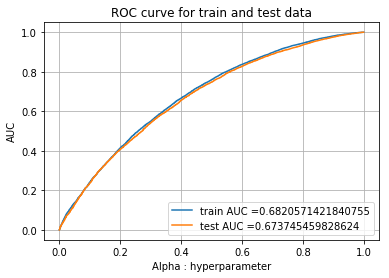

In [193]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

sgd_clf = SGDClassifier(loss = "hinge", alpha= best_alpha_avgw2v,penalty = "l1")
sgd_clf.fit(X_tr_avgw2v, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

calib_clf = CalibratedClassifierCV(sgd_clf, cv=5, method='sigmoid')
calib_clf.fit(X_tr_avgw2v, y_train)

y_train_pred_avgw2v = batch_predict(calib_clf, X_tr_avgw2v)    
y_test_pred_avgw2v = batch_predict(calib_clf, X_te_avgw2v)

train_fpr_avgw2v, train_tpr_avgw2v, tr_thresholds_avgw2v = roc_curve(y_train, y_train_pred_avgw2v)
test_fpr_avgw2v, test_tpr_avgw2v, te_thresholds_avgw2v = roc_curve(y_test, y_test_pred_avgw2v)

plt.plot(train_fpr_avgw2v, train_tpr_avgw2v, label="train AUC ="+str(auc(train_fpr_avgw2v, train_tpr_avgw2v)))

test_auc_avgw2v = auc(test_fpr_avgw2v, test_tpr_avgw2v)
plt.plot(test_fpr_avgw2v, test_tpr_avgw2v, label="test AUC ="+str(test_auc_avgw2v))
plt.legend()
plt.xlabel("Alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

**Summary**
From the above curves  we can clearly see that Area under the curve for test and train data is almost similar and the difference between two curves is just  1% and also AUC for both the curves is greater than 50% .so the model is sensisble.

### Confusion matrix

the maximum value of tpr*(1-fpr) 0.2499999818661462 for threshold 0.832


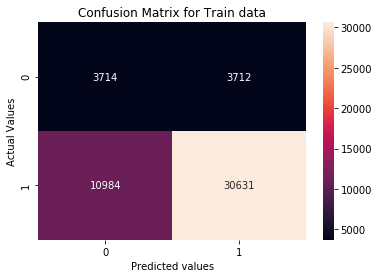

In [176]:
cm_3 = confusion_matrix(y_train, predict(y_train_pred_avgw2v, tr_thresholds_avgw2v, train_fpr_avgw2v, train_fpr_avgw2v))                   
cm_avgw2v = pd.DataFrame(cm_3 , range(2))
sns.heatmap(cm_avgw2v, annot = True, fmt = "d")
plt.title("Confusion Matrix for Train data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()     

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.832


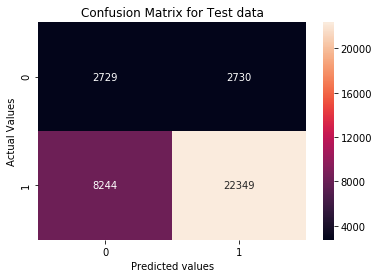

In [177]:
cm_3 = confusion_matrix(y_test, predict(y_test_pred_avgw2v, te_thresholds_avgw2v, test_fpr_avgw2v, test_fpr_avgw2v))                   
cm_avgw2v = pd.DataFrame(cm_3 , range(2))
sns.heatmap(cm_avgw2v, annot = True, fmt = "d")
plt.title("Confusion Matrix for Test data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()                        

### 2.4.4 Applying SVM on TFIDF W2V,<font color='red'> SET 4</font>

In [85]:

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
X_tr_tfidfw2v = hstack((X_train_essay_weightw2v,X_train_title_weightw2v, X_train_state_ohe, X_train_cleancat_ohe, X_train_grade_ohe,X_train_cleansubcat_ohe,X_train_prevpostproj_norm)).tocsr()
X_cr_tfidfw2v = hstack((X_cv_essay_weightw2v,X_cv_title_weightw2v, X_cv_state_ohe, X_cv_cleancat_ohe, X_cv_grade_ohe,X_cv_cleansubcat_ohe,X_cv_prevpostproj_norm)).tocsr()
X_te_tfidfw2v = hstack((X_test_essay_weightw2v,X_test_title_weightw2v, X_test_state_ohe, X_test_cleancat_ohe, X_test_grade_ohe,X_test_cleansubcat_ohe,X_test_prevpostproj_norm)).tocsr()


### Hyper parameter Tuning using Gridsearch

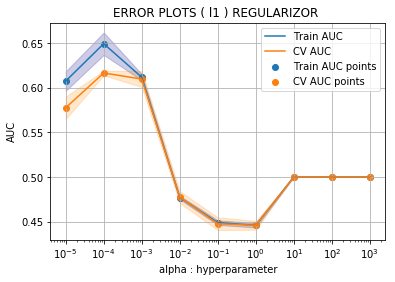


MAX AUC is  0.6163221143354316


In [178]:
hypertune(X_tr_tfidfw2v , y_train ,"l1" )

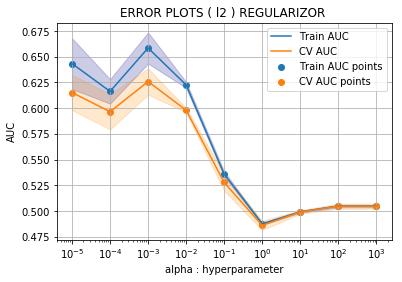


MAX AUC is  0.625826161215077


In [179]:
hypertune(X_tr_tfidfw2v , y_train ,"l2" )

**Summary**
From the above two plots  we can see that max AUC is with L1 Regularizor i.e, 63% and also in this plot as hyper parameter alpha increases train AUC and cv AUC increases gradually,but at alpha =0.0001 there is a sudden fall of both the curves and becomes constant at alpha = 10 .So the best hyper parameter is at alpha =0.0001.

In [180]:
best_alpha_tfidfw2v = 0.001

### ROC curve 

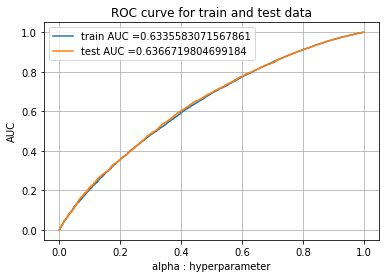

In [194]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

sgd_clf = SGDClassifier(loss = "hinge", alpha= best_alpha_tfidfw2v, penalty="l1")
sgd_clf.fit(X_tr_tfidfw2v, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

calib_clf = CalibratedClassifierCV(sgd_clf, cv=5, method='sigmoid')
calib_clf.fit(X_tr_tfidfw2v, y_train)

y_train_pred_tfidfw2v = batch_predict(calib_clf, X_tr_tfidfw2v)    
y_test_pred_tfidfw2v = batch_predict(calib_clf, X_te_tfidfw2v)

train_fpr_tfidfw2v, train_tpr_tfidfw2v, tr_thresholds_tfidfw2v = roc_curve(y_train, y_train_pred_tfidfw2v)
test_fpr_tfidfw2v, test_tpr_tfidfw2v, te_thresholds_tfidfw2v = roc_curve(y_test, y_test_pred_tfidfw2v)

plt.plot(train_fpr_tfidfw2v, train_tpr_tfidfw2v, label="train AUC ="+str(auc(train_fpr_tfidfw2v, train_tpr_tfidfw2v)))

test_auc_tfidfw2v = auc(test_fpr_tfidfw2v, test_tpr_tfidfw2v)
plt.plot(test_fpr_tfidfw2v, test_tpr_tfidfw2v, label="test AUC ="+str(test_auc_tfidfw2v))
plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

**Summary**
From the above curves  we can clearly see that Area under the curve for test and train data is almost similar and the difference between two curves is zero and also AUC for both the curves is greater than 50% .so the model is sensisble.

### Confusion matrix

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.815


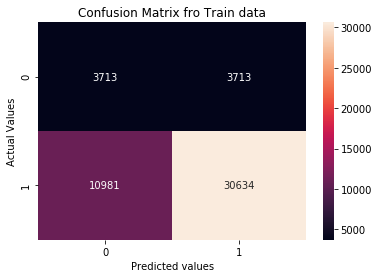

In [106]:
cm_4 = confusion_matrix(y_train, predict(y_train_pred_tfidfw2v, tr_thresholds_tfidfw2v, train_fpr_tfidfw2v, train_fpr_tfidfw2v))                   
cm_tfidfw2v = pd.DataFrame(cm_4 , range(2))
sns.heatmap(cm_tfidfw2v,annot = True, fmt = "d")
plt.title("Confusion Matrix fro Train data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()            

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.817


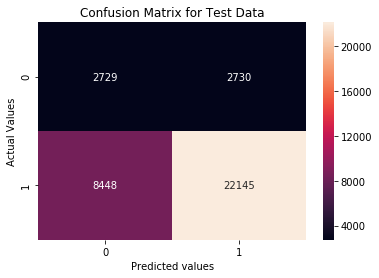

In [108]:
cm_4 = confusion_matrix(y_test, predict(y_test_pred_tfidfw2v, te_thresholds_tfidfw2v, test_fpr_tfidfw2v, test_fpr_tfidfw2v))                   
cm_tfidfw2v = pd.DataFrame(cm_4 , range(2))
sns.heatmap(cm_tfidfw2v,annot = True, fmt = "d")
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()                      

<h2>2.5 SVM with added Features `Set 5` </h2>

In [182]:
print("shape of TFIDF essay  ")
print()
print(X_train_essay_tfidf.shape)
print(X_cv_essay_tfidf.shape)
print(X_test_essay_tfidf.shape)

shape of TFIDF essay  

(49041, 5000)
(24155, 5000)
(36052, 5000)


### Dimentionality Reduction

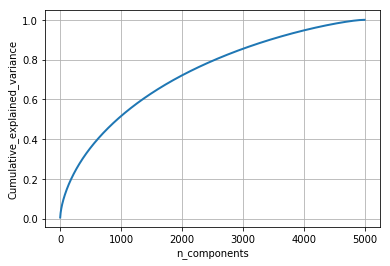

In [94]:
# PCA for dimensionality redcution (non-visualization)

# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 5000-1

pca.fit_transform(X_train_essay_tfidf.toarray())
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()



Here we require all the dimensions but for practice purpose lets reduce to 2500 deimensions for geting 80% of variance

In [96]:
# lets reduce using Truncated SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2500)

X_train_essay_tfidf_reduced = svd.fit_transform(X_train_essay_tfidf)
X_cv_essay_tfidf_reduced = svd.fit_transform(X_cv_essay_tfidf)
X_test_essay_tfidf_reduced = svd.fit_transform(X_test_essay_tfidf)

In [99]:
print("shape of TFIDF essay after reduction ")
print()
print(X_train_essay_tfidf_reduced.shape)
print(X_cv_essay_tfidf_reduced.shape)
print(X_test_essay_tfidf_reduced.shape)

shape of TFIDF essay after reduction 

(49041, 2500)
(24155, 2500)
(36052, 2500)


### Merge all the features 

In [100]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
X_tr_added = hstack((X_train_essay_tfidf_reduced,X_train_state_ohe, X_train_cleancat_ohe, X_train_grade_ohe,X_train_cleansubcat_ohe,X_train_prevpostproj_norm ,X_train_title_count_norm)).tocsr()
X_cv_added = hstack((X_cv_essay_tfidf_reduced,X_cv_state_ohe, X_cv_cleancat_ohe, X_cv_grade_ohe,X_cv_cleansubcat_ohe,X_cv_prevpostproj_norm,X_cv_title_count_norm)).tocsr()
X_te_added = hstack((X_test_essay_tfidf_reduced, X_test_state_ohe, X_test_cleancat_ohe, X_test_grade_ohe,X_test_cleansubcat_ohe,X_test_prevpostproj_norm,X_test_title_count_norm)).tocsr()


### Hyper parameter Tuning using Grid search

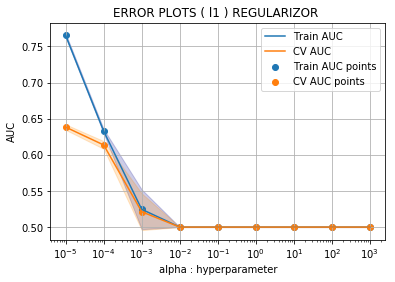


MAX AUC is  0.6382914080805708


In [183]:
hypertune(X_tr_added , y_train ,"l1" )

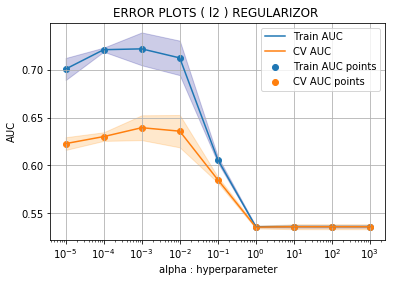


MAX AUC is  0.6393783944889193


In [184]:
hypertune(X_tr_added , y_train ,"l2" )

**Summary**
From the above two plots  we can see that we got almost similar results but AUC is slightly high with L2 Regularizor i.e, 63% and also in this plot as hyper parameter alpha increases train AUC and cv AUC increases gradually,but at alpha =0.01 there is a sudden fall of both the curves and becomes constant at alpha = 1 .So the best hyper parameter is at alpha =0.01.

In [185]:
best_alpha_added = 0.01

### Roc Curve

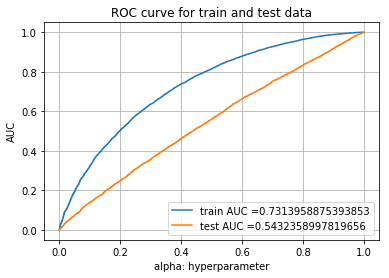

In [195]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

sgd_clf = SGDClassifier(loss="hinge",alpha = best_alpha_added ,penalty="l2")
sgd_clf.fit(X_tr_added, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

calib_clf = CalibratedClassifierCV(sgd_clf, cv=5, method='sigmoid')
calib_clf.fit(X_tr_added, y_train)

y_train_pred_added= batch_predict(calib_clf, X_tr_added)    
y_test_pred_added = batch_predict(calib_clf, X_te_added)

train_fpr_added, train_tpr_added, tr_thresholds_added = roc_curve(y_train, y_train_pred_added)
test_fpr_added, test_tpr_added, te_thresholds_added  = roc_curve(y_test, y_test_pred_added)

plt.plot(train_fpr_added, train_tpr_added, label="train AUC ="+str(auc(train_fpr_added, train_tpr_added)))

test_auc_added = auc(test_fpr_added, test_tpr_added)
plt.plot(test_fpr_added, test_tpr_added, label="test AUC ="+str(test_auc_added))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC curve for train and test data")
plt.grid()
plt.show()

**Summary**
From the above curves  we can clearly see that both Area under the curve for test data very low compared to train data and the difference between two curves is 19% and also AUC for both the curves is greater than 50% also the model is not performing well because of reduction in dimensinality we gor only 80% variance.

### Confusion matrix

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.811


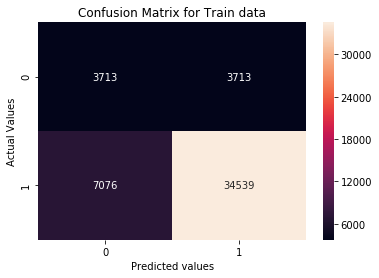

In [187]:
cm_5 = confusion_matrix(y_train, predict(y_train_pred_added, tr_thresholds_added, train_fpr_added, train_fpr_added))                   
cm_best = pd.DataFrame(cm_5 , range(2))
sns.heatmap(cm_best, annot = True, fmt = "d")
plt.title("Confusion Matrix for Train data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()                      

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.843


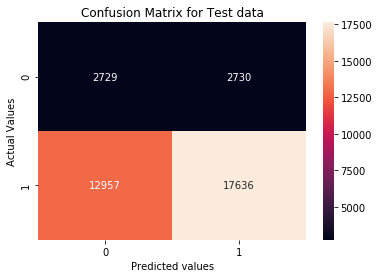

In [188]:
cm_5 = confusion_matrix(y_test, predict(y_test_pred_added, te_thresholds_added, test_fpr_added, test_fpr_added))                   
cm_best = pd.DataFrame(cm_5 , range(2))
sns.heatmap(cm_best, annot = True, fmt = "d")
plt.title("Confusion Matrix for Test data")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()                      

<h1>3. Conclusions</h1>

In [196]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
   
pt = PrettyTable()

pt.field_names = ["Vectorizer", "Model","Regularizor", "Hyper Parameter", "AUC"]

pt.add_row(["BOW", "Brute", "L2", str(best_alpha_bow), str(round(test_auc_bow,2))])
pt.add_row(["TFIDF", "Brute","L2", str(best_alpha_tfidf), str(round(test_auc_tfidf,2))])
pt.add_row(["AVGAVW2V", "Brute", "L1",str(best_alpha_avgw2v), str(round(test_auc_avgw2v,2))])
pt.add_row(["TFIDFW2V","Brute", "L1",str(best_alpha_tfidfw2v), str(round(test_auc_tfidfw2v,2))])
pt.add_row(["SEt-5 added features","Brute","L2", str(best_alpha_added), str(round(test_auc_added,2))])

print(pt)

+----------------------+-------+-------------+-----------------+------+
|      Vectorizer      | Model | Regularizor | Hyper Parameter | AUC  |
+----------------------+-------+-------------+-----------------+------+
|         BOW          | Brute |      L2     |       0.01      | 0.69 |
|        TFIDF         | Brute |      L2     |      0.001      | 0.68 |
|       AVGAVW2V       | Brute |      L1     |      0.0001     | 0.67 |
|       TFIDFW2V       | Brute |      L1     |      0.001      | 0.64 |
| SEt-5 added features | Brute |      L2     |       0.01      | 0.54 |
+----------------------+-------+-------------+-----------------+------+


1. Here the AUC is almost similar for BOW , TFIDF,TFIDF-W2V.
2. AUC is high in case of BOW i.e, 69%and for TFIDF and TFIDF-W2V it is samee i.e,68%
3. Here if notice for L2 resularizors AUC is somewhat high compared to L!.
4. Here if we see AUC is very low for set-5 because we reduced the dimensions to 2500 by considering 80% variance.so it is also    giving results not that great
5. So overall BOW performs better as their test AUC is high ,but we cant guaranteed as we took only subset of data 
